# Naive robot tracker

## The goal of this project is to identify the existence of a robot using simple Domain of Values operations, find the center point of the mask generated and print a tracker of the path traveled.

### First we need to generate the center point for one image and then create a loop and do the same for all data. We start by opening the reference and example images and turning them to grayscale.

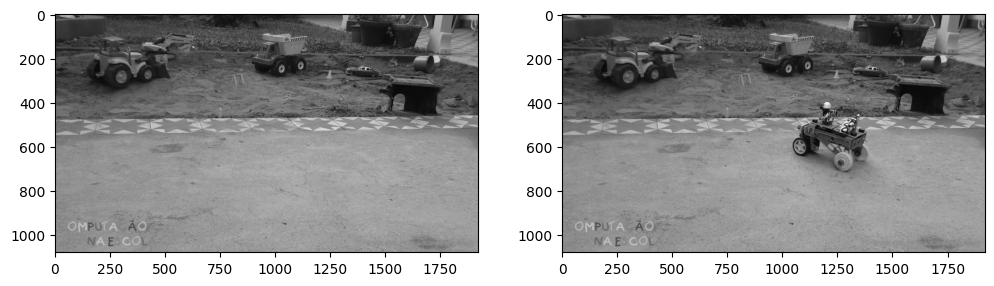

In [14]:
import cv2 as cv
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual

ref = cv.imread('images/shoot01.png')
car = cv.imread('images/shoot04.png')
ref = cv.cvtColor(ref, cv.COLOR_BGR2GRAY)
car = cv.cvtColor(car, cv.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(12,16))
axes[0].imshow(ref, 'gray')
axes[1].imshow(car, 'gray')

### Absolute difference value operation to identify the car

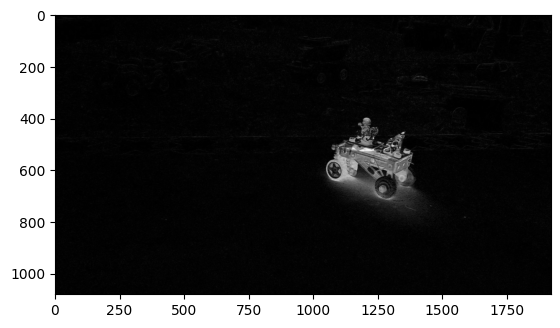

In [9]:
change = cv.absdiff(ref, car)
plt.imshow(change, 'gray')

### Binarize the image for image processing

In [15]:
def my_threshold(thresh):
    global dst
    global change
    th, dst = cv.threshold(change, thresh, 255,cv.THRESH_BINARY)
    fig, axes = plt.subplots(1, 2, figsize=(12,16))
    axes[0].imshow(change, 'gray')
    axes[1].imshow(dst, 'gray')

interactive(my_threshold, thresh=(0,255))

interactive(children=(IntSlider(value=127, description='thresh', max=255), Output()), _dom_classes=('widget-in…

### Create a kernal and apply opening morphology transformation to eliminate noise.

In [18]:
kernel = np.ones((5,5), np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

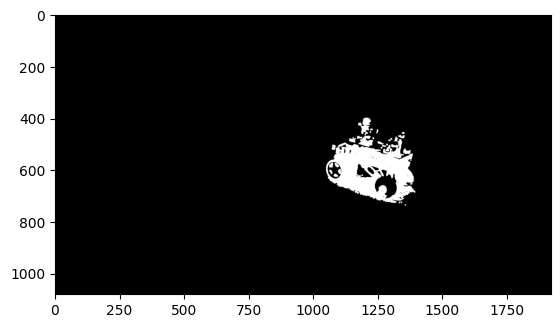

In [19]:
opening = cv.morphologyEx(dst, cv.MORPH_OPEN, kernel)
plt.imshow(opening, 'gray')

### Finding the center of the mask -> Run through all the image, find the pixels with 255 value and do the mean of x and y coordinates. Draw a circle on found point.

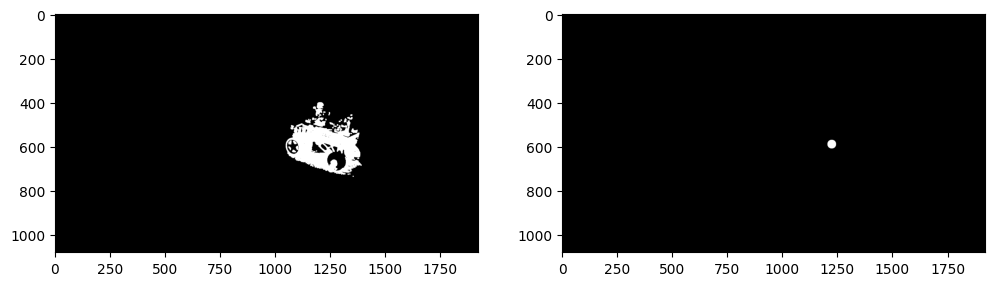

In [23]:
def findCenterMask(opening):
    tx = 0 # total x coordinates with 255 value
    ty = 0 # total y coordinates with 255 value
    sx = 0 # sum of x coordinates
    sy = 0 # sum of y coordinates
    cx = 0 # center x coordinate
    cy = 0 # center y coordinate

    for x in range(opening.shape[0]):
        for y in range(opening.shape[1]):
            if(opening[x][y] == 255):
                sx += x
                sy += y
                tx += 1
                ty += 1

    cx = sx // tx
    cy = sy // ty

    return cx, cy

cx, cy = findCenterMask(opening)
car_track = np.zeros((opening.shape[0], opening.shape[1]), np.uint8)
car_track = cv.circle(car_track, (cy, cx), 20, (255,255,255), -1)
fig, axes = plt.subplots(1, 2, figsize=(12,16))
axes[0].imshow(opening, 'gray')
axes[1].imshow(car_track, 'gray')

### Now apply the same process for all the images

677 1663
627 1396
587 1222
590 1038
612 946
604 1004
595 1085
556 1412
587 1308
680 1320
744 1504


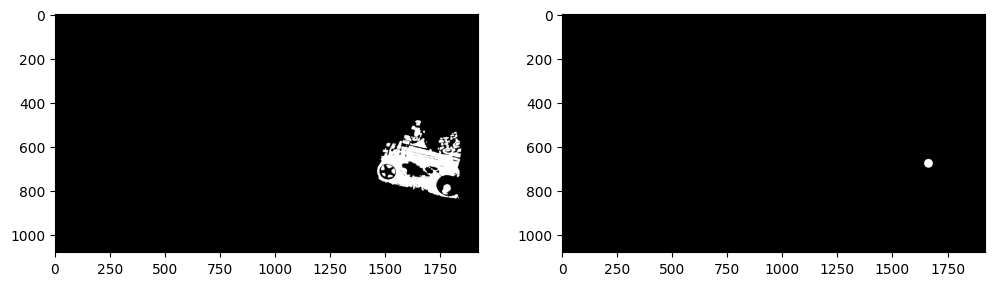

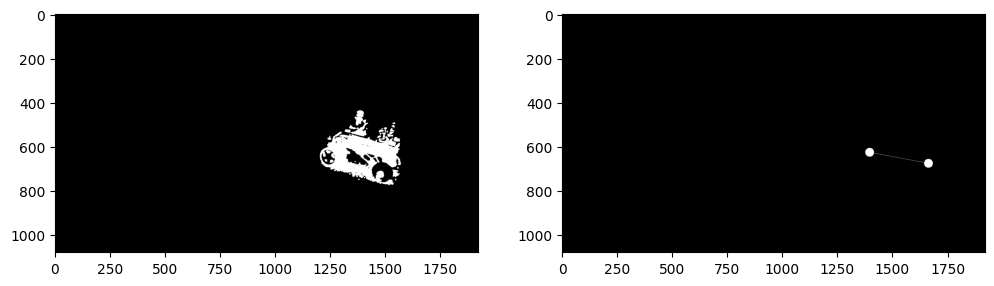

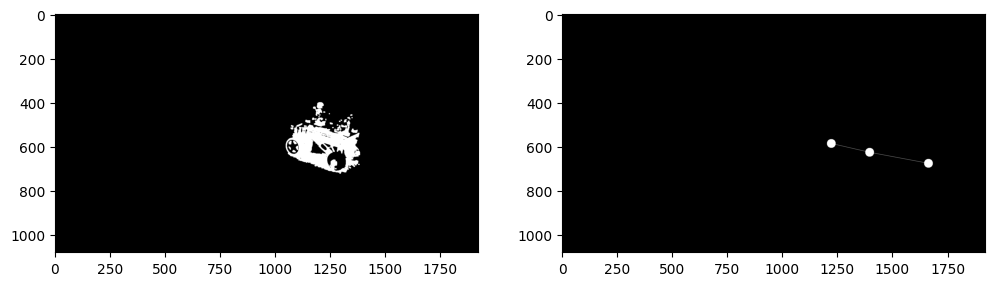

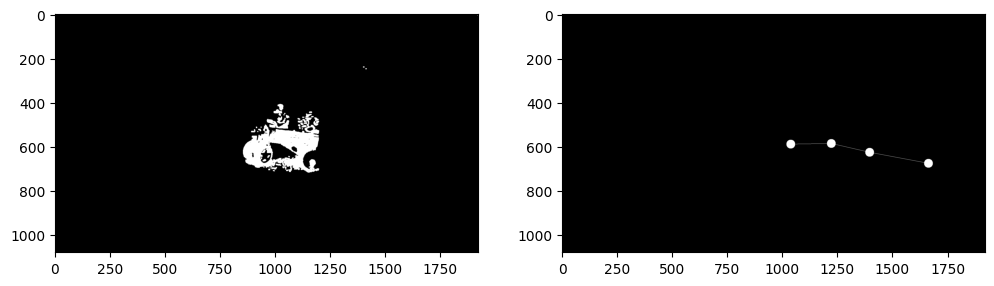

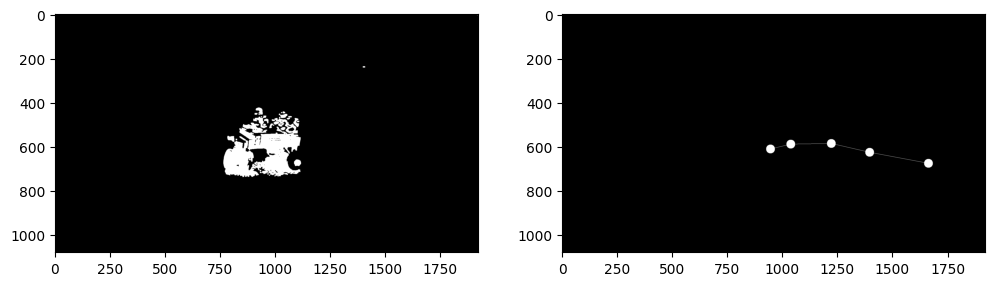

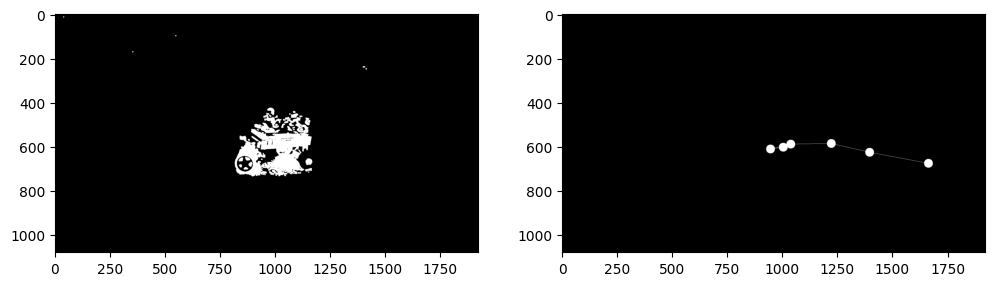

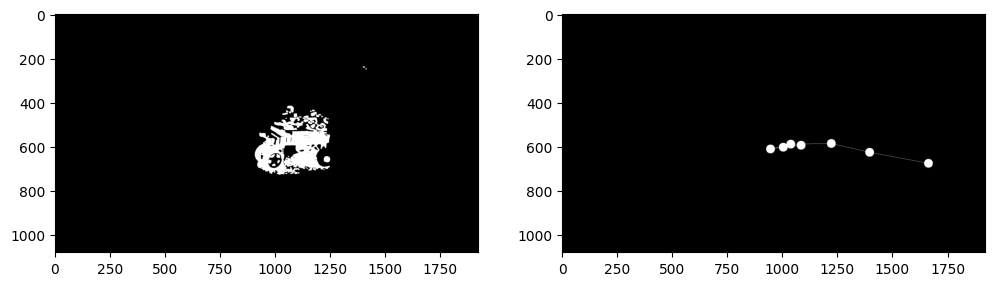

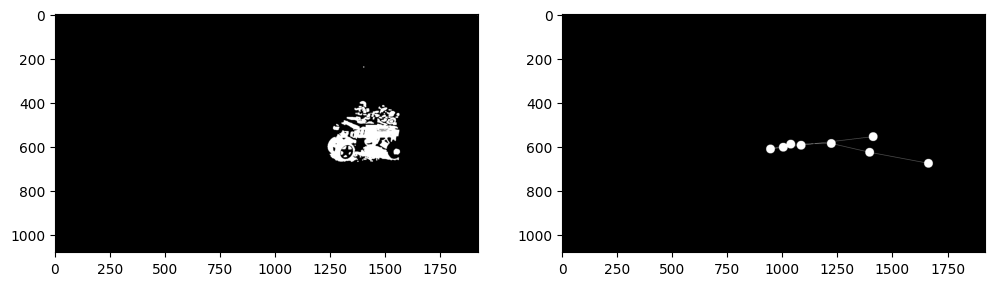

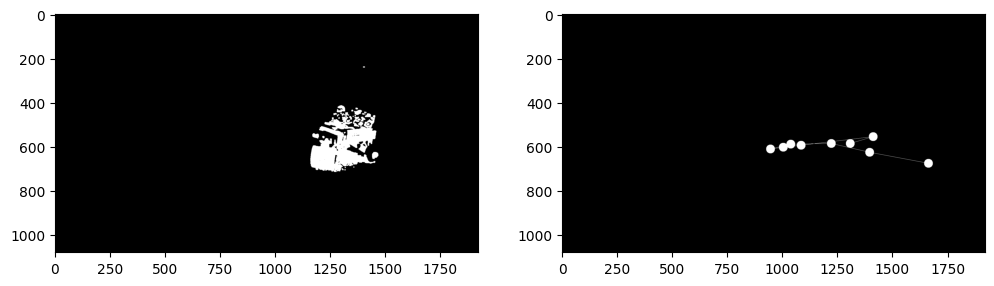

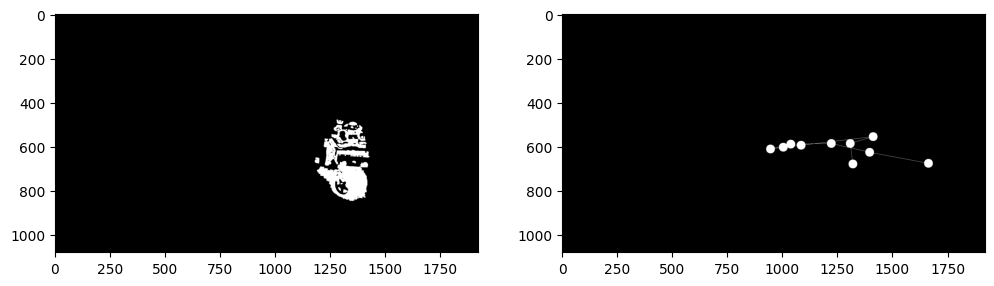

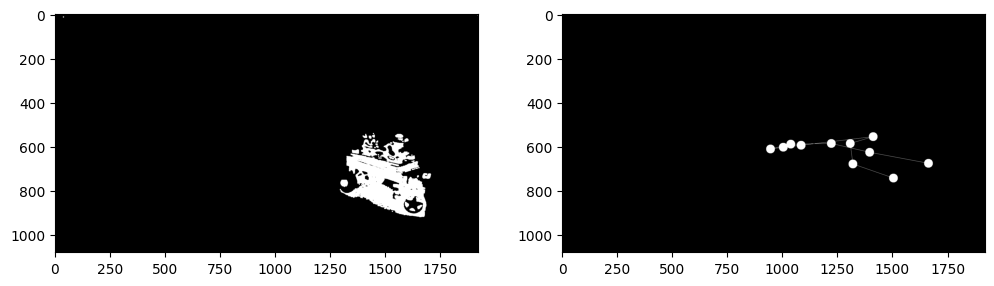

In [113]:
import os

img_list = []
cx = -1
cy = -1
cx_bef = -1
cy_bef = -1

# Insert the image name inside a list
for count, img_name in enumerate(sorted(os.listdir('images/'))):
    if(img_name == 'shoot01.png'):
        ref = cv.imread(f'images/{img_name}')
        ref = cv.cvtColor(ref, cv.COLOR_BGR2GRAY)
        car_track = np.zeros((ref.shape[0], ref.shape[1]))
        continue
    car = cv.imread(f'images/{img_name}')
    car = cv.cvtColor(car, cv.COLOR_BGR2GRAY)
    diff = cv.absdiff(ref, car)
    th, thresh_img = cv.threshold(diff, 45, 255,cv.THRESH_BINARY)
    kernel = np.ones((5,5), np.uint8)
    opening = cv.morphologyEx(thresh_img, cv.MORPH_OPEN, kernel)
    cx_bef = cx
    cy_bef = cy
    cx, cy = findCenterMask(opening)
    car_track = cv.circle(car_track, (cy, cx), 20, (255,255,255), -1)
    if(cx_bef != -1):
        car_track = cv.line(car_track, (cy_bef, cx_bef), (cy, cx), (255, 255, 255))
    print(cx, cy)
    fig, axes = plt.subplots(1, 2, figsize=(12,16))
    axes[0].imshow(opening, 'gray')
    axes[1].imshow(car_track, 'gray')

plt.imshow(car_track, 'gray')
     
    
    

